# 5.  Discovery: Exploración VS Explotación 

In [2]:
from PIL import Image
import requests
from io import BytesIO

## ¿Que tipo de enfoque utilizar para definir en que % de posiciones explorar y en que % explotar?

Poderia usar uma maneira iterativa onde, para a primeira vez de acesso a esta página, para este login, começaria com a proporção 50% exploração e 50% de anuncios de explotação. A medida que o usuário acessar mais vezes estas páginas, ir acumulando a proporção de vezes que ele clicou em um anúncio de exploração e de explotação, mantendo um mínimo de anúncios para cada uma delas, para que não deixemos de explorar e explotar em nenhum acesso. 

## ¿Qué métrica usarías para medir este experimento?

Podemos fazer um teste Exato de Fisher, onde, depois de um certo número de acessos do login, medimos a quantidade de:<br/>
    - Cliques para anúncios que são de exploração; <br/>
    - Não cliques para anúncios que são de exploração; <br/>
    - Cliques para anúncios que não são de exploração; <br/>
    - Não cliques para anúncios não que são de exploração. <br/>
O Teste Exato de Fisher é o mais adequado uma vez que a quantidade de anúncios em exploração e explotação é sabida antes da observação da quantidade de clique em cada uma delas.<br/>
A estatística do teste usada será a variáel com uma distribuição de probabilidade Hipergeométrica, e é a seguinte:

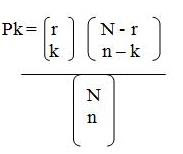

In [4]:
url = 'http://1.bp.blogspot.com/_ugp0tZksu-4/SgHlVjTHZyI/AAAAAAAAAFY/vzAsCNjJdYU/s400/figura2+-+C%C3%B3pia.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

onde: <br/>
    - r é a quantidade total de cliques; <br/>
    - k é a quantidade de cliques em anúncios de exploração;<br/>
    - N é a quantidade total de anúncios mostrados; <br/>
    - n é a quantidade total de anúncios de exploração. <br/>
já que queremos testar se a probabilidade de clicar em um anúncio de exploração é igual a probabilidade de não clicar em anúncios de exploração, ou seja, esta é o que chamamos da nossa hipótese nula.

Devemos então comparar a probabilidade do número de cliques em anúncios de exploração ser igual ao observado, com a probabilidade desse número ser menos, maior, ou diferente, de acordo com a hipótese alternativa.

Podemos fazer o experimento tanto com a soma de vários logins, ou, como cada indivíduo pode ter comportamentos bem particulares, fazer um experimento para cada login, e utilizar o resultado para como explorar/explotar os anúncios para este indivíduo, ou, no caso de vários logins, usar o resultado para os logins de perfil semelhante.

## ¿Cómo aprovecharías la interacción y el feedback de los usuarios?

Podemos, como dito antes, a cada acesso do usuário, recalcular a proporção de vezes em que ele clicou em um anúncio de exploração e explotação, e utilizar essas proporções para mostrar os próximos anúncios, até mesmo considerando o resultado do teste mencionado anteriormente, que mede se há uma diferença significativa entre as vezes que ele clicou em um anúncio de exploração ou não clicou, mostrando se ele tende a clicar mais neste tipo de anúncio ou não.